# Regularized Linear Regression

* 정규화 선형회귀는 선형회귀 계수에 대한 제약 조건을 추가하여 모델이 과도하게 최적화되는 현상을 막는 방법이다.

* 즉, 불편성은 포기하되 모형의 해석력을 단순화하자는 것이 초점이다.

## $\lambda$ 의 선택

* 교차타당법에 의한 선택이 일반적임

* 또는 임의의 $\lambda$ grid를 선택하고 가능한 모든 값 중 가장 우수한 $\lambda$를 선택

#  RIdge Regression

* 아래의 경우는 기존의 `LSE` 최소제곱법으로 $\beta_i$를 추정할 때 사용한다.

$$RSS = \sum_{i=1}^n(y_i - \beta_0 -\sum_{j=1}^p\beta_jx_{ij})^2$$

*  Ridge 추정량은 `LSE`와 매우 유사하나 `shrinkage penalty`를 추가로 고려하여 최소화한다.

$$\sum_{i=1}^n(y_i - \beta_0 -\sum_{j=1}^p\beta_jx_{ij})^2 + \lambda \sum_{i=1}^p \beta_j^2$$

$$\lambda \,:\,tuning \,\,parameter$$

* $\lambda$가 0이되면 일반적인 선형회귀모형이되고, $\lambda$가 커지면 **정규화 정도가 커진다.(회귀계수들이 작아진다.)** $\to$ `bias`는 증가 `variance`는 감소

* 릿지회귀모형에서는 **L2 penalty** 를 사용하여 베타계수들이 0에 근사하도록 한다.

## R 실습

In [109]:
library(tidyverse)
library(mosaicData)
library(glmnet) ## 리지 및 라쏘 회귀를 적합하기 위한 패키지

In [110]:
glimpse(RailTrail)

Rows: 90
Columns: 11
$ hightemp   <int> 83, 73, 74, 95, 44, 69, 66, 66, 80, 79, 78, 65, 41, 59, 50,~
$ lowtemp    <int> 50, 49, 52, 61, 52, 54, 39, 38, 55, 45, 55, 48, 49, 35, 35,~
$ avgtemp    <dbl> 66.5, 61.0, 63.0, 78.0, 48.0, 61.5, 52.5, 52.0, 67.5, 62.0,~
$ spring     <int> 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0,~
$ summer     <int> 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,~
$ fall       <int> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,~
$ cloudcover <dbl> 7.6, 6.3, 7.5, 2.6, 10.0, 6.6, 2.4, 0.0, 3.8, 4.1, 8.5, 7.2~
$ precip     <dbl> 0.00, 0.29, 0.32, 0.00, 0.14, 0.02, 0.00, 0.00, 0.00, 0.00,~
$ volume     <int> 501, 419, 397, 385, 200, 375, 417, 629, 533, 547, 432, 418,~
$ weekday    <lgl> TRUE, TRUE, TRUE, FALSE, TRUE, TRUE, TRUE, FALSE, FALSE, TR~
$ dayType    <chr> "weekday", "weekday", "weekday", "weekend", "weekday", "wee~


* model.matrix는 기본적으로 절편을 포함한 모형을 산정한다. 절편을 제외시킨 모형을 고려해보자

In [118]:
x <- model.matrix(volume~.-1 ,RailTrail) 

In [119]:
y <- RailTrail$volume

* 모형적합

In [120]:
ridge.fit <- cv.glmnet(x,y,alpha=0) ## 모형적합 alpha=0 은 릿지를 말함

* 교차타당에러를 최소로하는 람다값을 구한결과 `11.757`로 산출되었다.

In [130]:
bestlam <- ridge.fit$lambda.min
log(bestlam)

[1] 2.650585

In [122]:
coef(ridge.fit, s = "lambda.min")

12 x 1 sparse Matrix of class "dgCMatrix"
                       s1
(Intercept)     97.879570
hightemp         3.923302
lowtemp         -1.148241
avgtemp          1.971339
spring          10.236204
summer           3.316273
fall           -27.057463
cloudcover      -8.082976
precip         -90.969378
weekdayFALSE    13.410258
weekdayTRUE    -13.487794
dayTypeweekend  13.616159

In [123]:
options(repr.plot.res=200,repr.plot.height=4,repr.plot.width=10)

* bestlam에서 `MSE`가 최소가 되는 지점을 확인

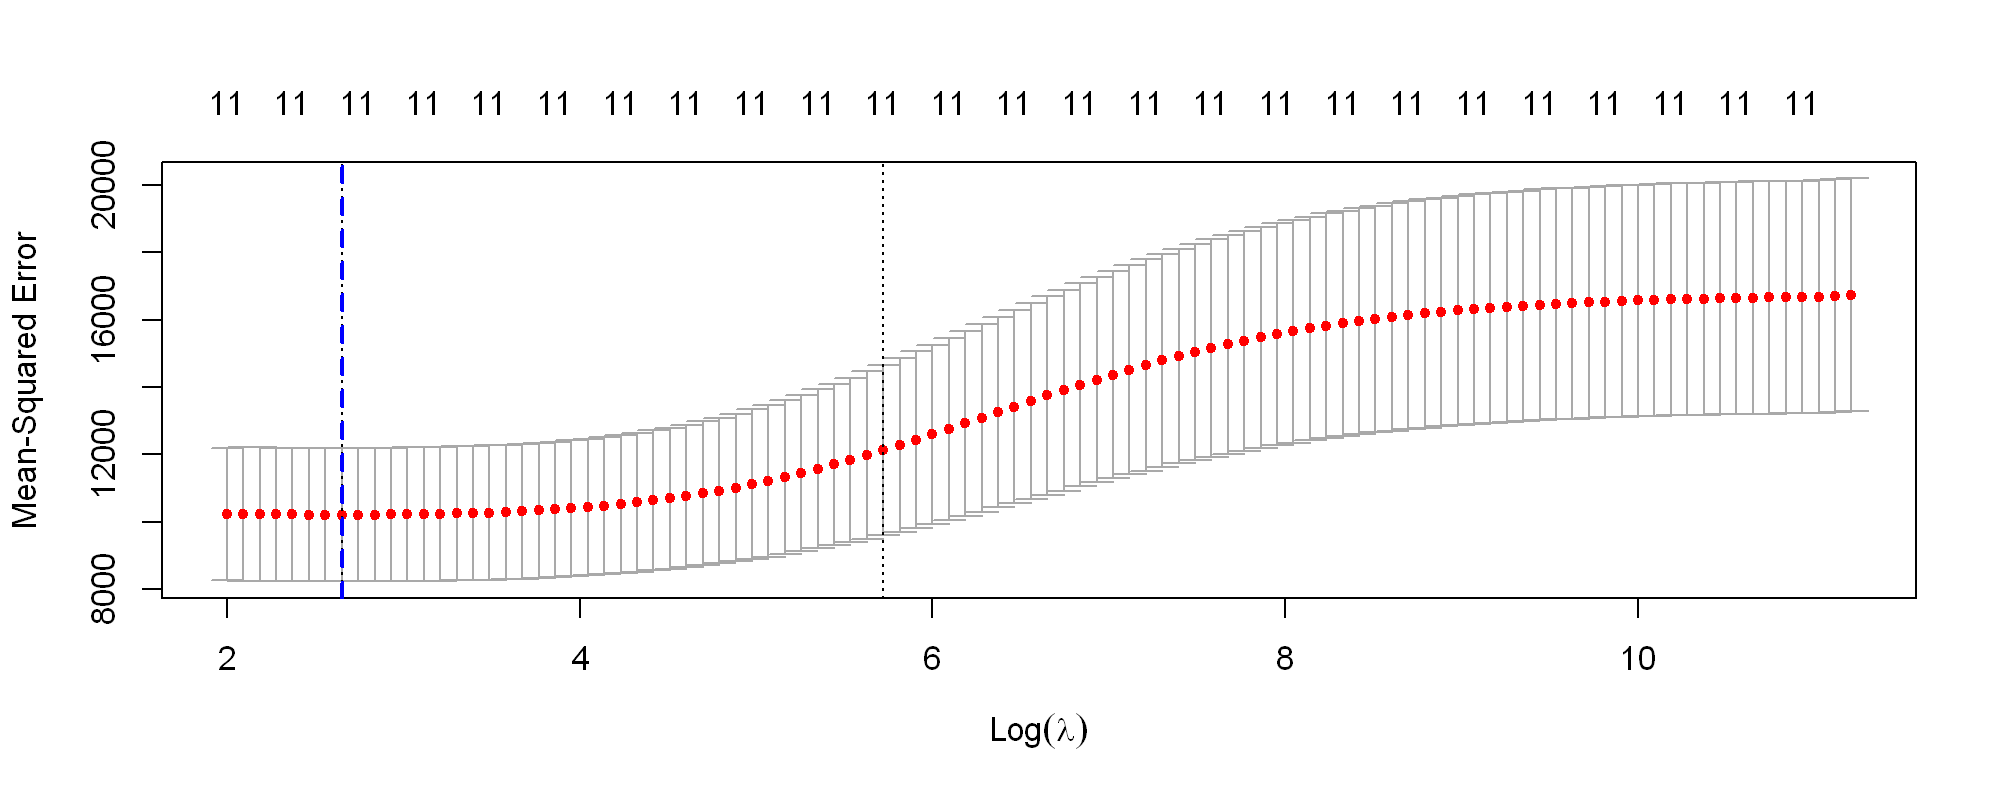

In [136]:
plot(ridge.fit)
abline(v=log(bestlam),lty="dashed",lwd=2,col="blue")

* 산출된 `best.lam`값으로 모형을 다시 적합 후 `MSE`를 구해보자.

In [137]:
train  <- sample(1:nrow(x),nrow(x)*0.7)
test  <- -train
y.test <- y[test]
y.train <- y[train]

In [139]:
ridge.fit <- glmnet(x[train,],y.train,alpha=0,lambda=bestlam,family="gaussian")

In [142]:
ridge.pred <- predict(ridge.fit,s=bestlam,newx=x[test,]) ## type="coefficients"로 하면 예측된 베타계수를 보여줌

In [147]:
ridge.coef <- predict(ridge.fit,s=bestlam,newx=x[test,],type="coefficients") ## type="coefficients"로 하면 예측된 베타계수를 보여줌

In [148]:
ridge.coef

12 x 1 sparse Matrix of class "dgCMatrix"
                        s1
(Intercept)     64.9007304
hightemp         3.9758591
lowtemp         -0.7261573
avgtemp          2.0855905
spring          20.3027908
summer         -13.1841751
fall           -18.2167429
cloudcover      -6.5169836
precip         -59.6275608
weekdayFALSE    12.1230181
weekdayTRUE    -12.6441270
dayTypeweekend  12.3701010

In [141]:
mean((ridge.pred - y.test)^2)

[1] 11360.2

* mse가 만 단위가 넘게 나왔는데. 지나치게 모형을 단순화 하였다는 생각이 든다.

***

# Lasso Regression

* 라쏘는 릿지와 다르게 베타계수를 **"0값으로 보낸다."**

* 이것을 **"L1 penalty"** 라고 부른다.

$$\sum_{i=1}^n(y_i - \beta_0 -\sum_{j=1}^p\beta_jx_{ij})^2 + \lambda \sum_{i=1}^p |\beta_j|$$

# R실습

In [161]:
lasso.fit <- cv.glmnet(x,y,alpha=1) ## 모형적합 alpha=1 은 라쏘를 말함

In [162]:
bestlam <- lasso.fit$lambda.min
log(bestlam)

[1] 1.510921

* 교차타당검정시 발생하는 에러값이 최소가되는 지점임을 확인

In [165]:
min(lasso.fit$cvm)

[1] 9549.053

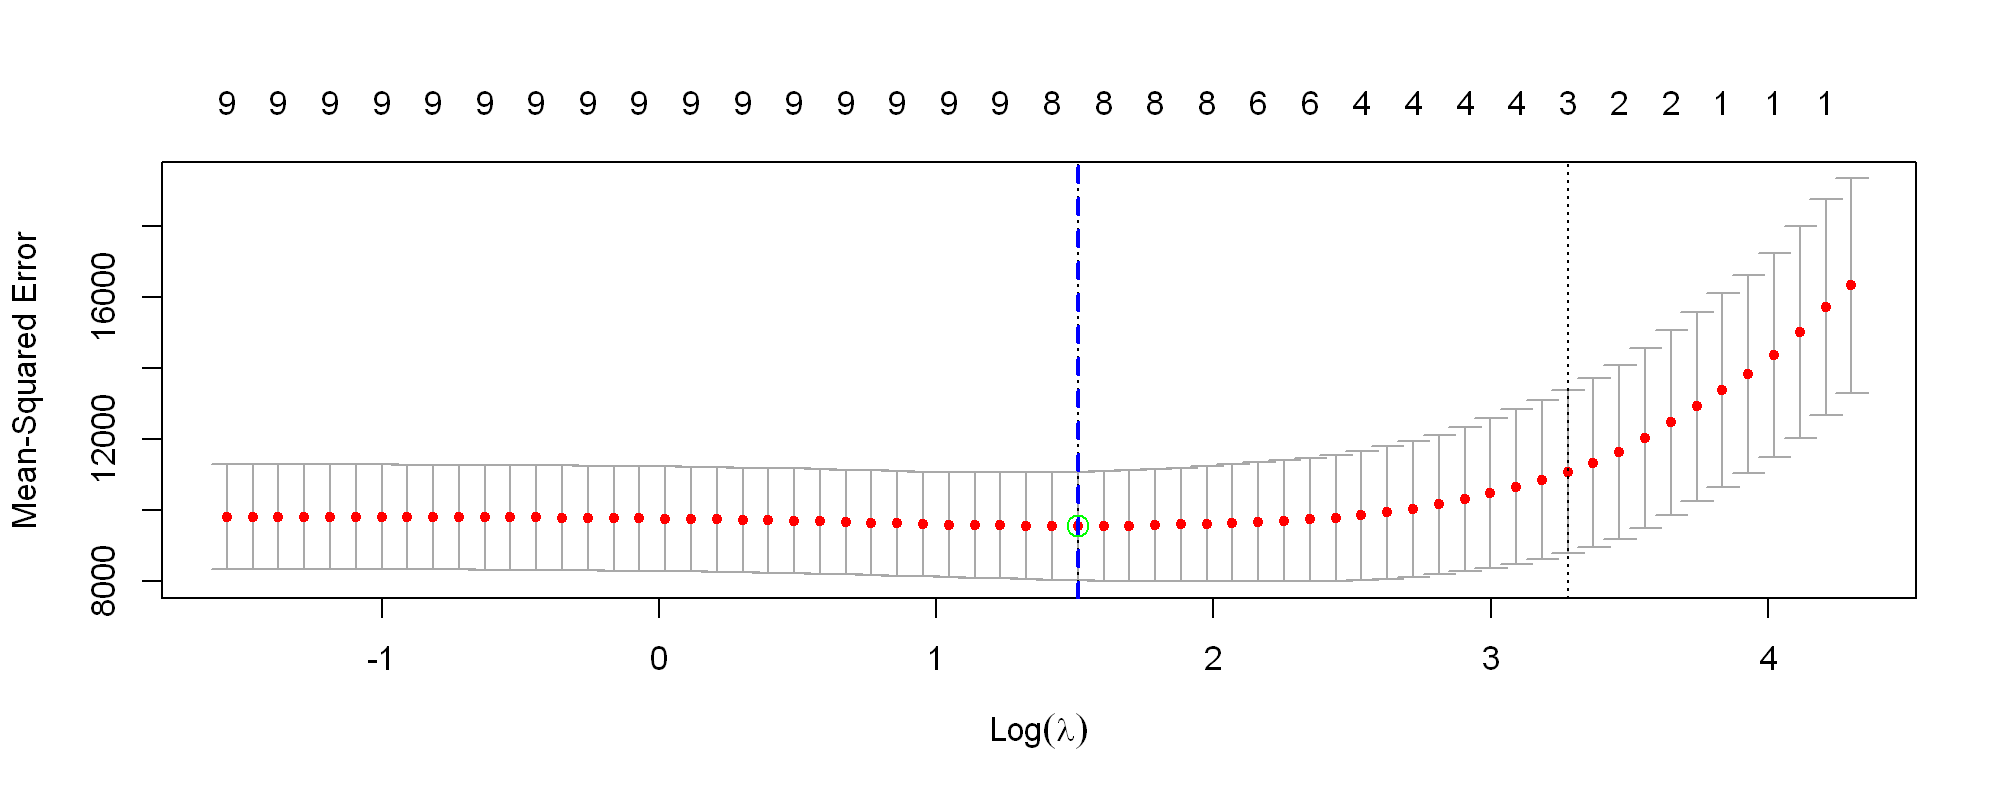

In [169]:
plot(lasso.fit)
abline(v=log(bestlam),lty="dashed",lwd=2,col="blue")
points(x=log(bestlam),y=min(lasso.fit$cvm),cex=1.5,col="green")

* 실제 예측을 하여 `MSE`값을 구해보자.

In [182]:
lasss <- glmnet(x[train,],y.train,alpha=1,family="gaussian",lambda=bestlam)

In [184]:
lasss$lambda

[1] 4.530904

In [188]:
pred.lasso <- predict(lasss,newx=x[test,],s=bestlam)

In [189]:
mean((pred.lasso-y.test)^2)

[1] 11635.83